<a href="https://colab.research.google.com/github/nyamskamau/Linear-Discriminant-Analysis-/blob/main/Linear_Discriminant_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#LDA (LINEAR DISCRIMINANT ANALYSIS)
#126015039

import pandas as pd
import numpy as np
import seaborn as sns;
sns.set_theme(style='darkgrid')
import matplotlib.pyplot as plt


In [3]:
loan_data = pd.read_csv('/content/Training Data.csv')

In [ ]:

loan_data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
loan_data.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,single,rented,no,Statistician,Avadi,Tamil_Nadu,7,11,0


In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


The dataset had 13 columns and 252,000 rows.

In [ ]:
#DATA CLEAING
loan_data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [ ]:
loan_data.duplicated().sum()

0

In [ ]:
loan_data.rename(columns={'Married/Single':'Relationship_Status',
                          'CITY' : 'City',
                          'STATE' : 'State',
                          "CURRENT_JOB_YRS":"Current_Job_Years",
                          "CURRENT_HOUSE_YRS":"Current_House_Years"},inplace=True)

Text(0.5, 1.0, 'Income Distribution of the Loan App Users')

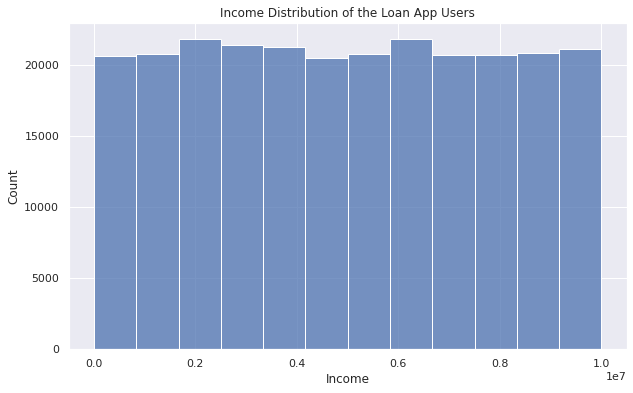

In [ ]:
#UNIVARITAE DATA ANALYSIS

plt.figure(figsize=(10, 6))
ax = sns.histplot(data=loan_data, x='Income',bins=12)
ax.set_title('Income Distribution of the Loan App Users')

The Income of the Loan App Users was uniformly distributed across the board.

Text(0.5, 1.0, 'Age Distribution of the Loan App Users')

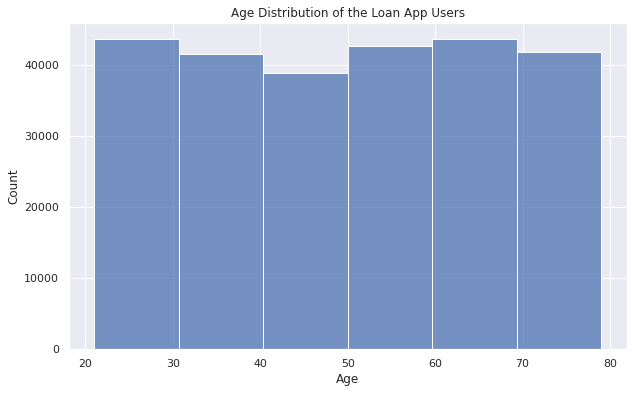

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.histplot(data=loan_data, x='Age', bins=6)
ax.set_title('Age Distribution of the Loan App Users')


There was no significant difference between the number of users between the different age groups. The 40-50 age group had the least number of users at 39,000 whereas the other age groups averaged over 40,000 users.

Text(0.5, 1.0, 'Distribution of Years of Experience of the Loan App Users')

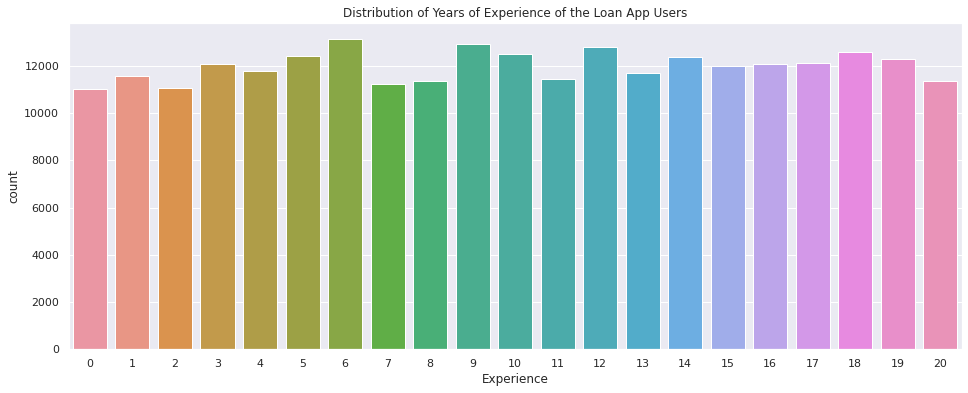

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(data=loan_data, x='Experience')
ax.set_title('Distribution of Years of Experience of the Loan App Users')

Users with 6 years of experience were the the majority of users of the Loan App.

Text(0.5, 1.0, 'Distribution of the Years spent at Current Job')

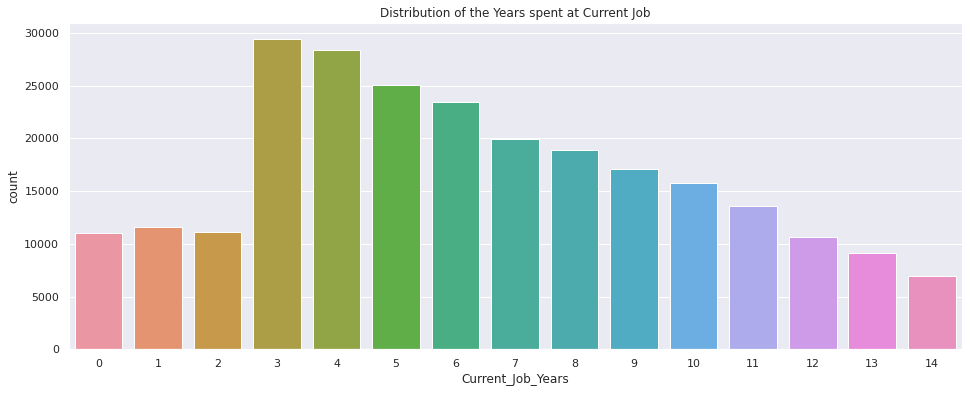

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(data=loan_data, x='Current_Job_Years')
ax.set_title('Distribution of the Years spent at Current Job')

Users who have spent 3-6 years at their current job made up the majority of the Loan App Users.

Text(0.5, 1.0, 'Distribution of the Years spent at Current House')

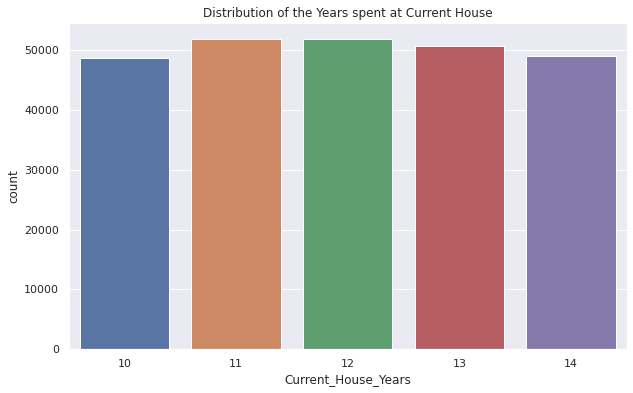

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=loan_data, x='Current_House_Years')
ax.set_title('Distribution of the Years spent at Current House')

Text(0.5, 1.0, 'Marital Status of the Loan App Users')

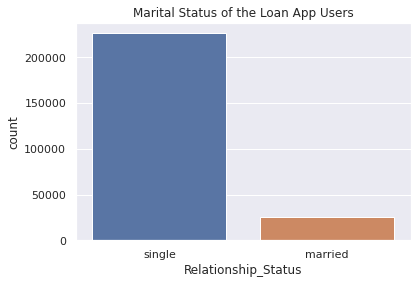

In [ ]:
ax = sns.countplot(data=loan_data, x='Relationship_Status')
ax.set_title('Marital Status of the Loan App Users')

Majority of the Users are Single.

Text(0.5, 1.0, 'House Ownership Status of the Loan App Users')

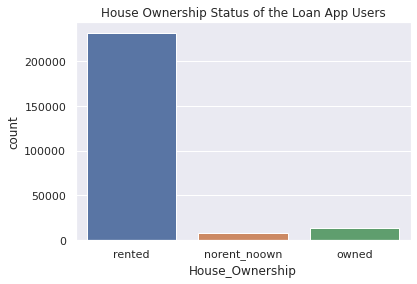

In [ ]:
ax = sns.countplot(data=loan_data, x='House_Ownership')
ax.set_title('House Ownership Status of the Loan App Users')

Majority of the Loan App users were renters as opposed to those who owned their homes and those who neither owned nor rented.

Text(0.5, 1.0, 'Car Ownership Status of the Loan App Users')

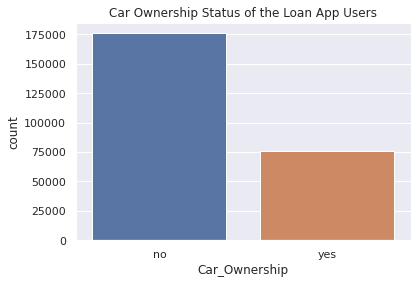

In [ ]:
ax = sns.countplot(data=loan_data, x='Car_Ownership')
ax.set_title('Car Ownership Status of the Loan App Users')

Majority if the App Users did not own a car.

Text(0.5, 1.0, 'Risk Flag Status of the Loan App Users')

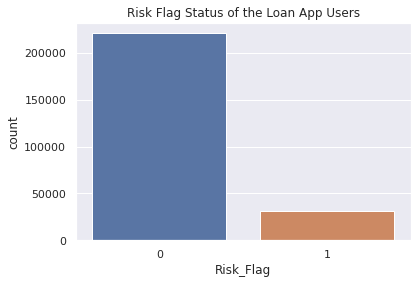

In [ ]:
ax = sns.countplot(data=loan_data, x='Risk_Flag')
ax.set_title('Risk Flag Status of the Loan App Users')

### 2.2. Bivariate Data Analysis

Text(0.5, 1.0, 'Car Ownership Status of the Loan App Users Against Risk_Flag')

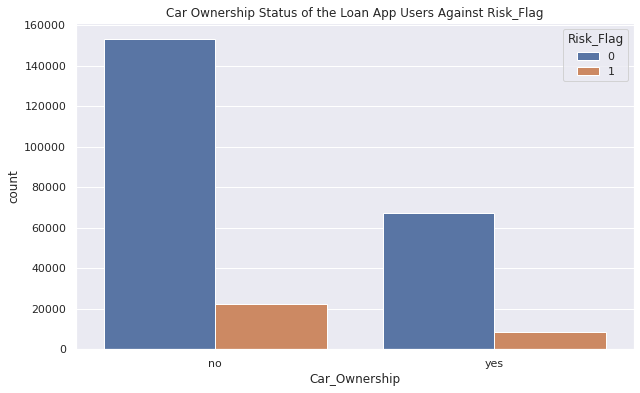

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=loan_data, x='Car_Ownership',hue='Risk_Flag')
ax.set_title('Car Ownership Status of the Loan App Users Against Risk_Flag')

The amount of users who were at risk of defaulting on their loans were proportionate against those users with and without a car.

Text(0.5, 1.0, 'Marital Status of the Loan App Users against Risk Flag')

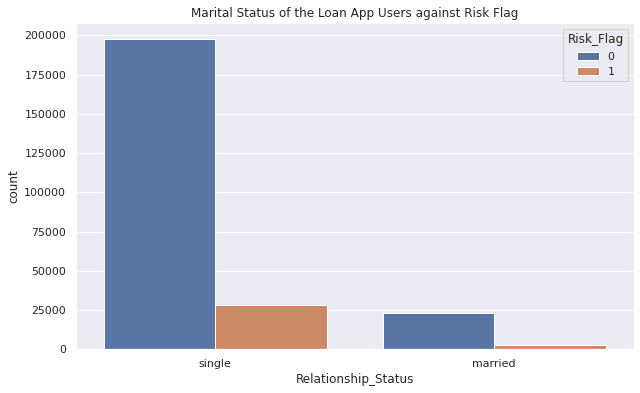

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=loan_data, x='Relationship_Status',hue='Risk_Flag')
ax.set_title('Marital Status of the Loan App Users against Risk Flag')

The amount of users who were at risk of defaulting on their loans were proportionate against those users who were single or those that were married.

Text(0.5, 1.0, 'Distribution of the Years spent at Current Job against Risk_Flag')

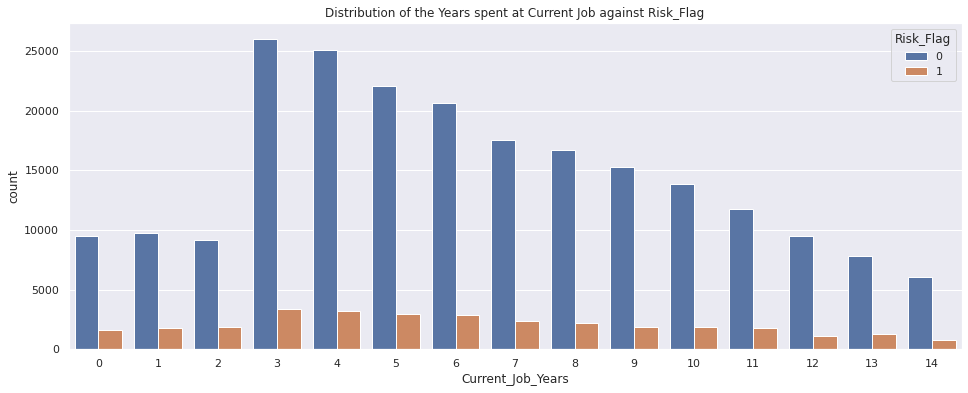

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(data=loan_data, x='Current_Job_Years',hue='Risk_Flag')
ax.set_title('Distribution of the Years spent at Current Job against Risk_Flag')

The amount of users who were at risk of defaulting on their loans were proportionate across the number of years users have spent at their current jobs.

Text(0.5, 1.0, 'Distribution of the Years spent at Current House against Risk Flag')

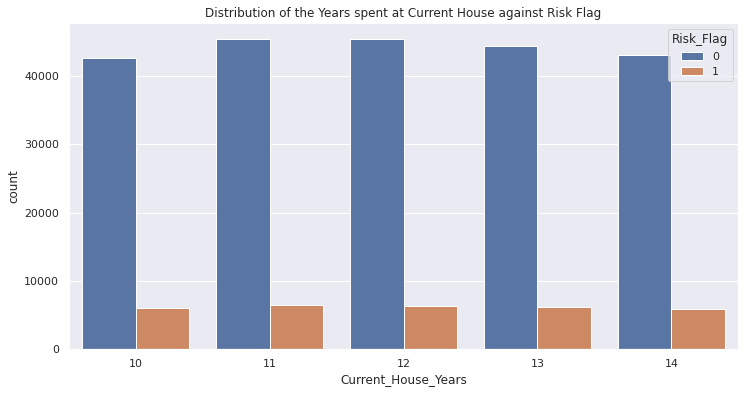

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.countplot(data=loan_data, x='Current_House_Years',hue='Risk_Flag')
ax.set_title('Distribution of the Years spent at Current House against Risk Flag')

Text(0.5, 1.0, 'Distribution of Years of Experience of the Loan App Users')

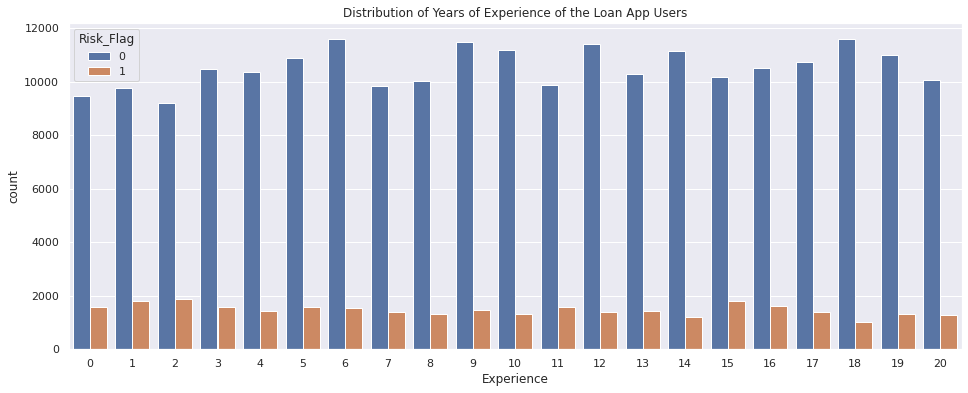

In [ ]:
plt.figure(figsize=(16, 6))
ax = sns.countplot(data=loan_data, x='Experience',hue='Risk_Flag')
ax.set_title('Distribution of Years of Experience of the Loan App Users')

In [ ]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()
loan_data['Relationship_Status'] = en.fit_transform(loan_data['Relationship_Status'])
loan_data['House_Ownership'] = en.fit_transform(loan_data['House_Ownership'])
loan_data['Car_Ownership'] = en.fit_transform(loan_data['Car_Ownership'])
loan_data['Profession'] = en.fit_transform(loan_data['Profession'])
loan_data['State'] = en.fit_transform(loan_data['State'])
loan_data

,Id,Income,Age,Experience,Relationship_Status,House_Ownership,Car_Ownership,Profession,City,State,Current_Job_Years,Current_House_Years,Risk_Flag
0,1,1303834,23,3,1,2,0,33,Rewa,13,3,13,0
1,2,7574516,40,10,1,2,0,43,Parbhani,14,9,13,0
2,3,3991815,66,4,0,2,0,47,Alappuzha,12,4,10,0
3,4,6256451,41,2,1,2,1,43,Bhubaneswar,17,2,12,1
4,5,5768871,47,11,1,2,0,11,Tiruchirappalli[10],22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,1,2,0,45,Kolkata,28,6,11,0
251996,251997,2843572,26,10,1,2,0,3,Rewa,13,6,11,0
251997,251998,4522448,46,7,1,2,0,17,Kalyan-Dombivli,14,7,12,0
251998,251999,6507128,45,0,1,2,0,27,Pondicherry,18,0,10,0


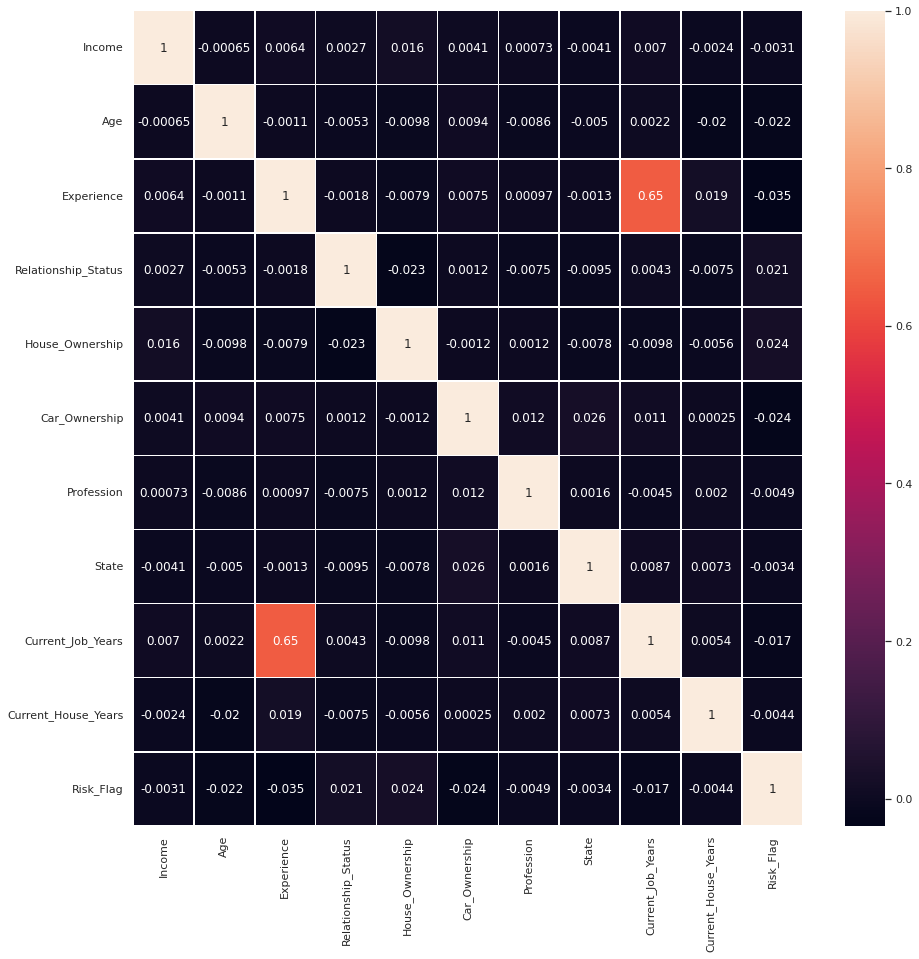

In [ ]:
df = loan_data.drop(['Id',"City"],1)

corrMatrix = df.corr()
corrMatrix

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corrMatrix, annot=True,  linewidths=.5, ax=ax)

In [ ]:
#MULTIVARIATE DATA ANALYSIS
X = loan_data.drop(['Id',"City",'Risk_Flag'],1)
y = loan_data['Risk_Flag']

X.head()

,Income,Age,Experience,Relationship_Status,House_Ownership,Car_Ownership,Profession,State,Current_Job_Years,Current_House_Years
0,1303834,23,3,1,2,0,33,13,3,13
1,7574516,40,10,1,2,0,43,14,9,13
2,3991815,66,4,0,2,0,47,12,4,10
3,6256451,41,2,1,2,1,43,17,2,12
4,5768871,47,11,1,2,0,11,22,3,14


In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA()

lda_= lda.fit(X,y)
lda_feat = lda_.transform(X)

lda_.coef_

array([[-3.48210627e-09, -3.83797317e-03, -2.04626103e-02,
         2.15395195e-01,  1.84411646e-01, -1.56403858e-01,
        -9.49143254e-04, -8.54912887e-04,  7.98233935e-03,
        -8.21386960e-03]])

In [ ]:
pd.set_option('display.float_format', lambda x: '%.7f' % x)
f_imp = pd.DataFrame(index=X.columns.values, data=lda_.coef_[0].T)
f_imp.sort_values(0, ascending=False)

,0
Relationship_Status,0.2153952
House_Ownership,0.1844116
Current_Job_Years,0.0079823
Income,-0.0000000
State,-0.0008549
Profession,-0.0009491
Age,-0.0038380
Current_House_Years,-0.0082139
Experience,-0.0204626
Car_Ownership,-0.1564039


Accuracy : 0.9666666666666667
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


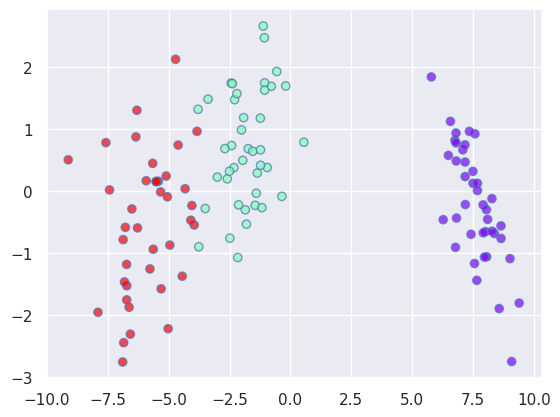

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

iris = load_iris()
dataset = pd.DataFrame(columns=iris.feature_names,data=iris.data)
dataset['target'] = iris.target

X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values


sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test,\
y_train, y_test = train_test_split(X, y,test_size=0.2)


lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)


plt.scatter(
    X_train[:, 0], X_train[:, 1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7, edgecolors='b'
)

classifier = RandomForestClassifier(max_depth=2,random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

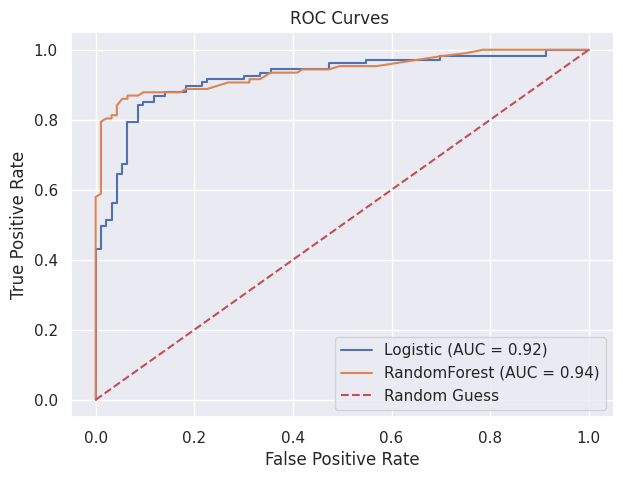

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
# Generate synthetic data for demonstration
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train two different models
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Generate predictions
y_pred_logistic = logistic_model.predict_proba(X_test)[:, 1]
y_pred_rf = random_forest_model.predict_proba(X_test)[:, 1]

# Create a DataFrame
test_df = pd.DataFrame({'True': y_test, 'Logistic': y_pred_logistic, 'RandomForest': y_pred_rf})

# Plot ROC curve for each model
plt.figure(figsize=(7, 5))

for model in ['Logistic', 'RandomForest']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves ')
plt.legend()
plt.show()

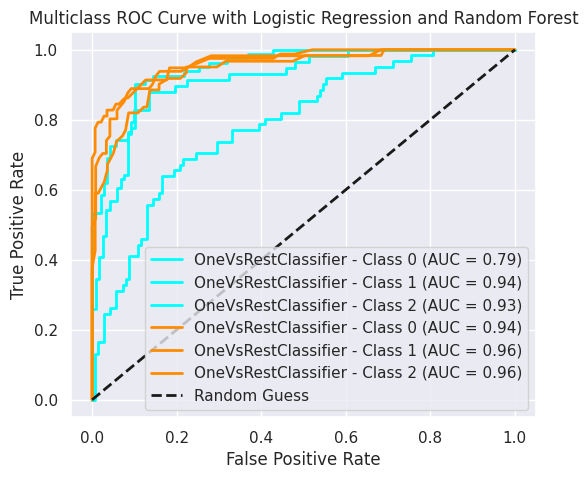

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from itertools import cycle

# Generate synthetic multiclass data
X, y = make_classification(
    n_samples=1000, n_features=20, n_classes=3, n_informative=10, random_state=42)

# Binarize the labels
y_bin = label_binarize(y, classes=np.unique(y))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.2, random_state=42)

# Train two different multiclass models
logistic_model = OneVsRestClassifier(LogisticRegression(random_state=42))
logistic_model.fit(X_train, y_train)

rf_model = OneVsRestClassifier(
    RandomForestClassifier(n_estimators=100, random_state=42))
rf_model.fit(X_train, y_train)


fpr = dict()
tpr = dict()
roc_auc = dict()

models = [logistic_model, rf_model]

plt.figure(figsize=(6, 5))
colors = cycle(['aqua', 'darkorange'])

for model, color in zip(models, colors):
    for i in range(model.classes_.shape[0]):
        fpr[i], tpr[i], _ = roc_curve(
            y_test[:, i], model.predict_proba(X_test)[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'{model.__class__.__name__} - Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve with Logistic Regression and Random Forest')
plt.legend(loc="lower right")
plt.show()